In [1]:
from os import listdir
from os.path import isfile, join
import datetime

import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt


%matplotlib inline

### Data - Restaurant Week 2018  (https://www.kaggle.com/popoandrew/restaurant-week-2018)

In [2]:
rstw_2018 = pd.read_csv('data/rstw_2018.csv')

# remove 57, 338 since they are not in yelp database
rstw_2018.drop(57, inplace=True)
rstw_2018.drop(338, inplace=True)
rstw_2018 = rstw_2018.reset_index(drop=True)

display(rstw_2018)

,name,street_address,google_map,review_count,phone,website,restaurant_type,average_review,food_review,service_review,...,star_1,star_2,star_3,star_4,star_5,description,restaurant_main_type,latitude,longitude,postal_code
0,Smoke Jazz and Supper Club,"2751 Broadway New York, NY 10025",//www.google.com/maps/search/?api=1&query=40.8...,2155,(212) 864-6662,http://www.smokejazz.com/,Contemporary American,4.421550,3.9,4.2,...,2,7,5,24,62,Smoke has augmented its reputation as one of M...,Contemporary American,40.801126,-73.968192,10025.0
1,Tavern on the Green,"1 Tavern on the Green New York, NY 10023",//www.google.com/maps/search/?api=1&query=40.7...,7029,(212) 877-8684,http://www.tavernonthegreen.com/,American,4.670290,4.4,4.4,...,1,2,6,19,72,Magical is a word thrown around a lot when dis...,American,40.772187,-73.977722,10023.0
2,ABC Kitchen,"35 East 18th Street New York, NY 10003",//www.google.com/maps/search/?api=1&query=40.7...,6031,(212) 475-5829,http://www.abckitchennyc.com/,Contemporary American,4.760310,4.6,4.4,...,1,2,5,15,77,ABC Kitchen with Jean-Georges: passionately co...,Contemporary American,40.737897,-73.989499,10003.0
3,Catch New York,"21 Ninth Avenue New York, NY 10014",//www.google.com/maps/search/?api=1&query=40.7...,4830,(212) 392-5978,http://www.catchhg.com/,Seafood,4.548300,4.6,4.2,...,3,2,6,15,74,CATCH features contemporary renditions of clas...,Seafood,40.740227,-74.006340,10014.0
4,Becco,"355 West 46th Street New York, NY 10010",//www.google.com/maps/search/?api=1&query=40.7...,18139,(212) 397-7597,http://www.becco-nyc.com/,Italian,4.418139,4.4,4.4,...,1,3,9,27,60,Lidia Bastianich & her son Joe's Theater Distr...,Italian,40.760804,-73.989832,10010.0
5,Estiatorio Milos - NY,"125 West 55th Street New York, NY 10019",//www.google.com/maps/search/?api=1&query=40.7...,4404,(212) 245-7400,http://www.estiatoriomilos.com/,Seafood,4.844040,4.8,4.6,...,1,1,3,14,81,"The freshest, most flavorful fish, vegetables ...",Seafood,40.763598,-73.978951,10019.0
6,Tao Uptown,"42 East 58th Street New York, NY 10022",//www.google.com/maps/search/?api=1&query=40.7...,10600,(212) 888-2288,http://www.taorestaurant.com/,Asian,4.610600,4.5,4.4,...,1,2,7,21,69,"A 16-foot Buddha, which floats above a reflect...",Asian,40.762607,-73.971478,10022.0
7,Red Rooster Harlem,"310 Lenox Avenue New York, NY 10027",//www.google.com/maps/search/?api=1&query=40.8...,5682,(212) 792-9001,http://redroosterharlem.com/,Southern,4.456820,4.4,4.2,...,2,3,10,24,61,"Located in the heart of Harlem, Red Rooster se...",Other,40.808057,-73.944914,10027.0
8,Del Frisco's Double Eagle Steak House - New Yo...,"1221 Avenue of the Americas New York, NY 10020",//www.google.com/maps/search/?api=1&query=40.7...,7225,(212) 575-5129,http://delfriscos.com/,Steakhouse,4.772250,4.6,4.7,...,1,2,5,16,76,A midtown classic with sprawling views of the ...,Steakhouse,40.759425,-73.982222,10020.0
9,FIG & OLIVE Fifth Avenue,"10 East 52nd Street New York, NY 10021",//www.google.com/maps/search/?api=1&query=40.7...,7186,(212) 319-2002,http://www.figandolive.com/,Mediterranean,4.571860,4.5,4.3,...,1,3,7,25,64,FIG & OLIVE is about passion for the best oliv...,Mediterranean,40.759280,-73.975634,10021.0


In [3]:
rstw_2018.columns

Index(['name', 'street_address', 'google_map', 'review_count', 'phone',
       'website', 'restaurant_type', 'average_review', 'food_review',
       'service_review', 'ambience_review', 'value_review', 'price_range',
       'star_1', 'star_2', 'star_3', 'star_4', 'star_5', 'description',
       'restaurant_main_type', 'latitude', 'longitude', 'postal_code'],
      dtype='object')

### Yelp Data - download from Yelp API

In [11]:
yelp_rsts = pd.read_csv("data/yelp_rst_2019.csv")
yelp_rsts.head()

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,smoke-jazz-and-supper-club-new-york-2,"[{'alias': 'jazzandblues', 'title': 'Jazz & Bl...","{'latitude': 40.8012384, 'longitude': -73.9681...",(212) 864-6662,5.912356,trbr9pYDDmXCj9z8m2d6LQ,https://s3-media2.fl.yelpcdn.com/bphoto/mtoknH...,False,"{'address1': '2751 Broadway', 'address2': None...",Smoke Jazz & Supper Club,1.212865e+10,$$,4.0,352,"['pickup', 'delivery']",https://www.yelp.com/biz/smoke-jazz-and-supper...
1,tavern-on-the-green-new-york-7,"[{'alias': 'newamerican', 'title': 'American (...","{'latitude': 40.772194, 'longitude': -73.9776}",(212) 877-8684,20.401585,hKdvsbuQRtjajWYwjaoOQw,https://s3-media1.fl.yelpcdn.com/bphoto/fBgjO7...,False,"{'address1': '67 Central Park W', 'address2': ...",Tavern on the Green,1.212878e+10,$$$,3.5,1240,[],https://www.yelp.com/biz/tavern-on-the-green-n...
2,abc-kitchen-new-york,"[{'alias': 'newamerican', 'title': 'American (...","{'latitude': 40.738085, 'longitude': -73.989472}",(212) 475-5829,39.424873,dMhRafXdr765DHe0k-QfaQ,https://s3-media2.fl.yelpcdn.com/bphoto/k2V0Qy...,False,"{'address1': '35 E 18th St', 'address2': '', '...",ABC Kitchen,1.212476e+10,$$$,4.0,2866,[],https://www.yelp.com/biz/abc-kitchen-new-york?...
3,catch-new-york-new-york,"[{'alias': 'advertising', 'title': 'Advertisin...","{'latitude': 40.74681, 'longitude': -73.98442}",(212) 715-8700,1994.761480,7mB_COyhOY1k01JcOu-wTw,https://s3-media4.fl.yelpcdn.com/bphoto/q1THJC...,False,"{'address1': '15 E 32nd St', 'address2': '4th ...",Catch -New York,1.212716e+10,NaN,3.5,37,[],https://www.yelp.com/biz/catch-new-york-new-yo...
4,becco-new-york-4,"[{'alias': 'italian', 'title': 'Italian'}]","{'latitude': 40.76083, 'longitude': -73.98981}",(212) 397-7597,3.072498,QObHX0yR6zd0WfksRDbJTA,https://s3-media3.fl.yelpcdn.com/bphoto/w5_bcc...,False,"{'address1': '355 W 46th St', 'address2': '', ...",Becco,1.212398e+10,$$$,3.5,2680,[],https://www.yelp.com/biz/becco-new-york-4?adju...


### Restaurant Reviews  - Scrape from Yelp website

In [140]:
dir_path = "data/reviews"
review_files = [f for f in listdir(dir_path) if f.endswith('.csv') and isfile(join(dir_path, f))]
review_files.sort()

rst_week_start = datetime.date(2018, 7, 23)
rst_week_end = datetime.date(2018, 8, 17)

results = pd.DataFrame(data=[], columns=['alias', 'cur_rating', 'review_count', 'avg_rating', 'rating_1s', 'rating_2s', 'rating_3s', 'rating_4s', 'rating_5s', 
                                         'rw_review_count', 'rw_avg_rating', 'rw_rating_1s', 'rw_rating_2s', 'rw_rating_3s', 'rw_rating_4s', 'rw_rating_5s',
                                        'price_range', 'restaurant_main_type']) #, 
for f in review_files:
    print(f)
    idx = int(f.split('_')[0])
    reviews = pd.read_csv(join(dir_path, f))
    reviews['time_created'] = pd.to_datetime(reviews['time_created'])

    row = []
    row.append(yelp_rsts.loc[idx]['alias'])
    row.append(yelp_rsts.loc[idx]['rating'])
    row.append(reviews.shape[0])
    row.append(round(reviews['rating'].mean(), 2))
    for i in range(1, 6):
        row.append(reviews[reviews['rating'] == i].shape[0])
    
    rw_reviews = reviews[(rst_week_start <= reviews['time_created']) & (reviews['time_created'] <= rst_week_end)]
    row.append(rw_reviews['rating'].shape[0])
    row.append(round(rw_reviews['rating'].mean(), 2))
    for i in range(1, 6):
        row.append(rw_reviews[rw_reviews['rating'] == i].shape[0])
    row.append(rstw_2018.loc[idx]['price_range'])
    row.append(rstw_2018.loc[idx]['restaurant_main_type'])

    
    results.loc[idx] = pd.Series(row, index=results.columns)

display(results)
results.to_csv("data/review_analysis.csv")

000_smoke_jazz_and_supper_club_new_york_2.csv
001_tavern_on_the_green_new_york_7.csv


/Users/yuekunwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.


002_abc_kitchen_new_york.csv
003_catch_new_york_new_york.csv
004_becco_new_york_4.csv
005_estiatorio_milos_new_york.csv
006_tao_uptown_new_york.csv
007_red_rooster_harlem_new_york_3.csv
008_del_friscos_double_eagle_steakhouse_new_york.csv
009_fig_and_olive_fifth_ave_new_york_4.csv
010_rosa_mexicano_new_york_6.csv
011_abc_cocina_new_york.csv
012_gallaghers_steakhouse_new_york.csv
013_boulud_sud_new_york.csv
014_nougatine_at_jean_georges_new_york_3.csv
015_sarabeths_new_york_10.csv
016_tao_downtown_new_york_2.csv
017_ilili_new_york_2.csv
018_scarpetta_new_york.csv
019_atlantic_grill_new_york_3.csv
020_empellón_new_york_3.csv
021_ocean_prime_new_york.csv
022_sarabeths_west_new_york.csv
024_toloache_50_new_york.csv
025_blue_fin_new_york.csv
026_bar_boulud_new_york_2.csv
027_hakkasan_new_york.csv
028_lincoln_ristorante_new_york.csv
029_cafe_boulud_new_york_4.csv
030_the_view_restaurant_and_lounge_new_york.csv
031_park_avenue_autumn_winter_spring_summer_new_york_3.csv
032_zuma_new_york_2.csv

245_the_gin_parlour_new_york.csv
246_michael_jordans_the_steak_house_nyc_new_york_2.csv
247_beauty_and_essex_new_york.csv
248_the_mercer_kitchen_new_york_6.csv
249_the_dutch_new_york.csv
250_lafayette_new_york_2.csv
251_vandal_new_york.csv
252_gotham_bar_and_grill_new_york.csv
253_il_buco_alimentari_and_vineria_new_york_2.csv
254_bar_primi_new_york_3.csv
255_lure_fishbar_new_york_2.csv
256_nix_new_york.csv
257_lupa_new_york.csv
258_claudette_new_york.csv
259_empellón_taqueria_new_york.csv
260_perry_st_new_york.csv
261_boucherie_west_village_new_york_3.csv
262_indochine_new_york.csv
263_el_vez_new_york.csv
264_public_kitchen_new_york_2.csv
265_tamarind_new_york_4.csv
266_the_stanton_social_new_york.csv
267_hearth_new_york.csv
268_sarabeths_tribeca_new_york.csv
269_leuca_brooklyn.csv
270_sant_ambroeus_new_york_4.csv
271_il_cantinori_new_york.csv
272_mr_chow_new_york.csv
273_narcissa_new_york.csv
274_il_mulino_new_york_downtown_new_york_2.csv
275_sant_ambroeus_new_york.csv
276_pig_and_kha

,alias,cur_rating,review_count,avg_rating,rating_1s,rating_2s,rating_3s,rating_4s,rating_5s,rw_review_count,rw_avg_rating,rw_rating_1s,rw_rating_2s,rw_rating_3s,rw_rating_4s,rw_rating_5s,price_range,restaurant_main_type
0,smoke-jazz-and-supper-club-new-york-2,4.0,350,3.78,30,32,44,122,122,5,2.20,1,2,2,0,0,$31 to $50,Contemporary American
1,tavern-on-the-green-new-york-7,3.5,1238,3.38,208,163,192,304,371,29,3.86,1,5,4,6,13,$31 to $50,American
2,abc-kitchen-new-york,4.0,2855,4.09,101,169,359,969,1257,20,3.80,3,2,2,2,11,$31 to $50,Contemporary American
3,catch-new-york-new-york,3.5,36,3.44,9,2,4,6,15,1,1.00,1,0,0,0,0,$31 to $50,Seafood
4,becco-new-york-4,3.5,2674,3.73,211,261,462,857,883,16,4.12,0,3,1,3,9,$30 and under,Italian
5,estiatorio-milos-new-york,4.0,827,3.99,42,62,106,271,346,12,4.42,0,0,2,3,7,$50 and over,Seafood
6,tao-uptown-new-york,3.5,2449,3.55,219,267,521,822,620,12,3.67,2,0,2,4,4,$31 to $50,Asian
7,red-rooster-harlem-new-york-3,3.5,2939,3.53,273,420,573,828,845,36,3.78,3,6,4,6,17,$31 to $50,Other
8,del-friscos-double-eagle-steakhouse-new-york,4.5,2751,4.29,89,127,276,657,1602,44,4.41,1,1,6,7,29,$50 and over,Steakhouse
9,fig-and-olive-fifth-ave-new-york-4,3.5,1098,3.57,89,124,203,432,250,13,3.77,0,2,4,2,5,$31 to $50,Mediterranean


In [69]:
analysis = pd.read_csv("data/review_analysis.csv", index_col=0)
analysis['diff'] = analysis['rw_avg_rating'] - analysis['avg_rating']
analysis.head()

,alias,cur_rating,review_count,avg_rating,rating_1s,rating_2s,rating_3s,rating_4s,rating_5s,rw_review_count,rw_avg_rating,rw_rating_1s,rw_rating_2s,rw_rating_3s,rw_rating_4s,rw_rating_5s,price_range,restaurant_main_type,diff
0,smoke-jazz-and-supper-club-new-york-2,4.0,350,3.78,30,32,44,122,122,5,2.20,1,2,2,0,0,$31 to $50,Contemporary American,-1.58
1,tavern-on-the-green-new-york-7,3.5,1238,3.38,208,163,192,304,371,29,3.86,1,5,4,6,13,$31 to $50,American,0.48
2,abc-kitchen-new-york,4.0,2855,4.09,101,169,359,969,1257,20,3.80,3,2,2,2,11,$31 to $50,Contemporary American,-0.29
3,catch-new-york-new-york,3.5,36,3.44,9,2,4,6,15,1,1.00,1,0,0,0,0,$31 to $50,Seafood,-2.44
4,becco-new-york-4,3.5,2674,3.73,211,261,462,857,883,16,4.12,0,3,1,3,9,$30 and under,Italian,0.39


In [80]:
analysis.groupby(['price_range']).count()

,alias,cur_rating,review_count,avg_rating,rating_1s,rating_2s,rating_3s,rating_4s,rating_5s,rw_review_count,rw_avg_rating,rw_rating_1s,rw_rating_2s,rw_rating_3s,rw_rating_4s,rw_rating_5s,restaurant_main_type,diff
price_range,,,,,,,,,,,,,,,,,,
$30 and under,53,53,53,53,53,53,53,53,53,53,51,53,53,53,53,53,53,51
$31 to $50,228,228,228,228,228,228,228,228,228,228,213,228,228,228,228,228,228,213
$50 and over,64,64,64,64,64,64,64,64,64,64,63,64,64,64,64,64,64,63


In [85]:
rst_type = pd.read_csv("data/rst_type.csv")
rst_type.head()

,Unnamed: 0,overall,excellent,better,worse,other
0,$30 and under,53,2,20,12,19
1,$31 to $50,228,14,67,65,82
2,$50 and over,64,8,19,18,19


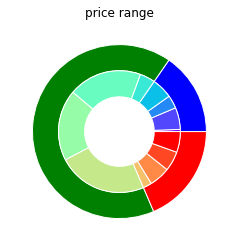

In [105]:
import matplotlib.cm as cm

fig, ax = plt.subplots()

size = 0.3
vals = np.array([[2, 20,12,19], [14,67,65,82], [8,19,18,19]])

cmap = plt.get_cmap("tab20c")
outer_colors = ['b','g','r']
inner_colors = cm.rainbow(np.linspace(0, 1, 12))

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='price range')
plt.show()


### Profiling Restaurant Week 2018 Summer

#### price

In [7]:
def getRatios(dataframe, column):
    items = dataframe[column].unique()
    labels = []
    ratios = []
    counts = []
    for item in items:
        labels.append(item.replace('$', '\$'))
        counts.append(dataframe[dataframe[column] == item].shape[0])
        ratios.append(counts[-1] / dataframe.shape[0])

    return labels, ratios, counts

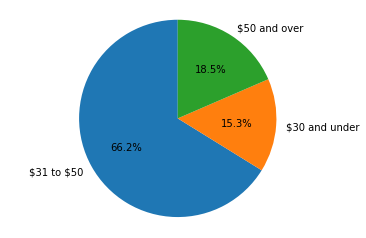

In [8]:
labels, ratios, counts = getRatios(rstw_2018, 'price_range')
fig, ax = plt.subplots()
ax.pie(ratios, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [53]:
analysis.shape

(345, 18)

#### Category

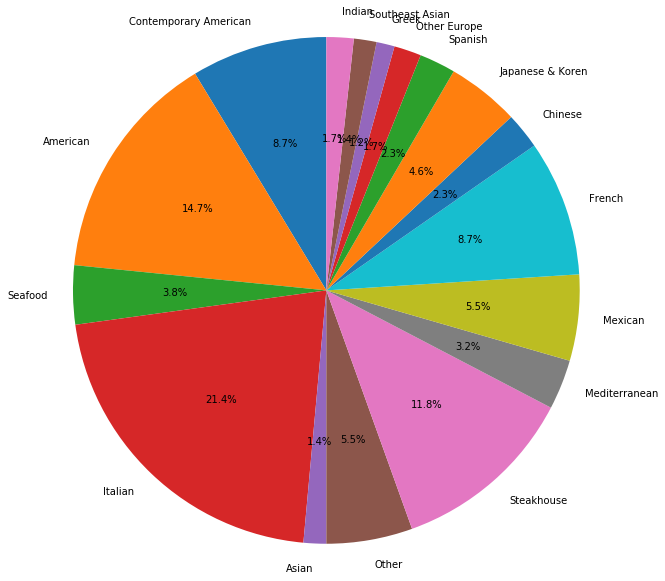

In [8]:
labels, ratios, counts = getRatios(rstw_2018, 'restaurant_main_type')
fig, ax = plt.subplots(figsize=[10, 10])
ax.pie(ratios, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### No review on rst week

In [9]:
no_reviews = analysis[analysis['rw_review_count'] == 0]
print(no_reviews.shape[0])
display(no_reviews)

18


,alias,cur_rating,review_count,avg_rating,rating_1s,rating_2s,rating_3s,rating_4s,rating_5s,rw_review_count,rw_avg_rating,rw_rating_1s,rw_rating_2s,rw_rating_3s,rw_rating_4s,rw_rating_5s
141,etcetera-etcetera-new-york,4.0,406,3.97,17,30,63,136,160,0,NaN,0,0,0,0,0
142,cafe-centro-new-york-8,3.5,149,3.47,7,24,40,48,30,0,NaN,0,0,0,0,0
165,cipriani-new-york-2,3.5,99,3.56,15,8,14,31,31,0,NaN,0,0,0,0,0
174,delmonicos-kitchen-new-york-3,3.5,321,3.49,33,49,63,81,95,0,NaN,0,0,0,0,0
184,tarallucci-e-vino-upper-west-side-new-york,3.5,111,3.67,10,9,25,31,36,0,NaN,0,0,0,0,0
203,nick-and-stefs-steakhouse-new-york,3.5,204,3.45,21,26,48,58,51,0,NaN,0,0,0,0,0
212,haru-sushi-new-york-18,3.5,73,3.27,14,9,12,19,19,0,NaN,0,0,0,0,0
237,triomphe-new-york-2,3.5,132,3.60,10,17,24,46,35,0,NaN,0,0,0,0,0
242,the-morgan-dining-room-new-york,4.0,23,3.83,0,3,3,12,5,0,NaN,0,0,0,0,0
243,montebello-ristorante-italiano-new-york,3.5,83,3.33,11,10,17,31,14,0,NaN,0,0,0,0,0


In [145]:
best_rstw = analysis[analysis['rw_review_count'] >= 10].sort_values(['rw_avg_rating', 'avg_rating'], ascending=False)
best_rstw

,alias,cur_rating,review_count,avg_rating,rating_1s,rating_2s,rating_3s,rating_4s,rating_5s,rw_review_count,rw_avg_rating,rw_rating_1s,rw_rating_2s,rw_rating_3s,rw_rating_4s,rw_rating_5s,price_range,restaurant_main_type
255,lure-fishbar-new-york-2,4.0,1554,3.86,73,120,256,613,492,11,4.73,0,0,1,1,9,$31 to $50,Seafood
286,delmonicos-new-york,4.0,968,3.80,53,100,169,315,331,11,4.73,0,0,0,3,8,$50 and over,Steakhouse
67,the-metropolitan-museum-of-art-new-york-3,4.5,2613,4.74,40,24,75,298,2176,16,4.69,0,0,1,3,12,$50 and over,Contemporary American
96,the-seafire-grill-new-york-4,4.5,1058,4.40,25,44,82,236,671,21,4.57,1,0,1,3,16,$31 to $50,Seafood
21,ocean-prime-new-york,4.5,481,4.42,13,22,33,96,317,24,4.42,0,2,2,4,16,$31 to $50,Seafood
5,estiatorio-milos-new-york,4.0,827,3.99,42,62,106,271,346,12,4.42,0,0,2,3,7,$50 and over,Seafood
331,greenwich-steakhouse-new-york,4.5,207,4.46,16,9,5,11,166,17,4.41,0,3,0,1,13,$50 and over,Steakhouse
8,del-friscos-double-eagle-steakhouse-new-york,4.5,2751,4.29,89,127,276,657,1602,44,4.41,1,1,6,7,29,$50 and over,Steakhouse
295,temple-court-new-york,3.5,179,3.66,21,21,27,38,72,13,4.31,0,1,3,0,9,$31 to $50,American
149,trattoria-zero-otto-nove-bronx,4.0,700,4.08,31,51,78,211,329,10,4.30,0,1,1,2,6,$31 to $50,Italian


In [55]:
better = analysis[(analysis['rw_review_count'] != 0) & (analysis['rw_avg_rating'] - analysis['avg_rating'] >= 0.05)]
better.groupby(['restaurant_main_type']).count()

,alias,cur_rating,review_count,avg_rating,rating_1s,rating_2s,rating_3s,rating_4s,rating_5s,rw_review_count,rw_avg_rating,rw_rating_1s,rw_rating_2s,rw_rating_3s,rw_rating_4s,rw_rating_5s,price_range
restaurant_main_type,,,,,,,,,,,,,,,,,
American,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
Asian,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Chinese,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Contemporary American,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
French,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
Greek,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Indian,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Italian,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35
Japanese & Koren,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10


In [56]:
even_better = better[(better['rw_avg_rating'] >= 4) & (better['rw_review_count'] >= 10)].sort_values(['rw_avg_rating', 'avg_rating'], ascending=False)
print(even_better.shape)
even_better.head()

(25, 18)


,alias,cur_rating,review_count,avg_rating,rating_1s,rating_2s,rating_3s,rating_4s,rating_5s,rw_review_count,rw_avg_rating,rw_rating_1s,rw_rating_2s,rw_rating_3s,rw_rating_4s,rw_rating_5s,price_range,restaurant_main_type
255,lure-fishbar-new-york-2,4.0,1554,3.86,73,120,256,613,492,11,4.73,0,0,1,1,9,$31 to $50,Seafood
286,delmonicos-new-york,4.0,968,3.80,53,100,169,315,331,11,4.73,0,0,0,3,8,$50 and over,Steakhouse
96,the-seafire-grill-new-york-4,4.5,1058,4.40,25,44,82,236,671,21,4.57,1,0,1,3,16,$31 to $50,Seafood
5,estiatorio-milos-new-york,4.0,827,3.99,42,62,106,271,346,12,4.42,0,0,2,3,7,$50 and over,Seafood
8,del-friscos-double-eagle-steakhouse-new-york,4.5,2751,4.29,89,127,276,657,1602,44,4.41,1,1,6,7,29,$50 and over,Steakhouse


In [77]:
worse = analysis[(analysis['rw_review_count'] != 0) & (analysis['rw_avg_rating'] - analysis['avg_rating'] <= -0.25)]
worse.groupby(['price_range']).count()

,alias,cur_rating,review_count,avg_rating,rating_1s,rating_2s,rating_3s,rating_4s,rating_5s,rw_review_count,rw_avg_rating,rw_rating_1s,rw_rating_2s,rw_rating_3s,rw_rating_4s,rw_rating_5s,restaurant_main_type,diff
price_range,,,,,,,,,,,,,,,,,,
$30 and under,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
$31 to $50,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65
$50 and over,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22


In [68]:
not_worthy = worse[worse['avg_rating'] <= 3.5].sort_values(['rw_avg_rating', 'avg_rating'])
print(not_worthy.shape)
not_worthy.head(7)

(29, 18)


,alias,cur_rating,review_count,avg_rating,rating_1s,rating_2s,rating_3s,rating_4s,rating_5s,rw_review_count,rw_avg_rating,rw_rating_1s,rw_rating_2s,rw_rating_3s,rw_rating_4s,rw_rating_5s,price_range,restaurant_main_type
225,gaby-brasserie-française-new-york,3.0,95,3.16,13,18,17,35,12,2,1.00,2,0,0,0,0,$31 to $50,French
3,catch-new-york-new-york,3.5,36,3.44,9,2,4,6,15,1,1.00,1,0,0,0,0,$31 to $50,Seafood
173,le-colonial-new-york,3.5,260,3.35,29,34,65,82,50,9,1.67,6,1,1,1,0,$31 to $50,Southeast Asian
65,the-national-bar-and-dining-rooms-new-york-2,3.0,616,2.92,115,131,138,150,82,2,2.00,1,0,1,0,0,$30 and under,Contemporary American
89,mr-chow-new-york,3.0,328,3.01,73,52,65,74,64,3,2.00,2,0,0,1,0,$50 and over,Chinese
272,mr-chow-new-york,3.0,328,3.01,73,52,65,74,64,3,2.00,2,0,0,1,0,$50 and over,Chinese
179,shun-lee-palace-new-york,3.0,273,3.03,56,50,47,71,49,3,2.00,1,1,1,0,0,$31 to $50,Chinese


In [152]:
not_worthy.groupby(['price_range']).count()

,alias,cur_rating,review_count,avg_rating,rating_1s,rating_2s,rating_3s,rating_4s,rating_5s,rw_review_count,rw_avg_rating,rw_rating_1s,rw_rating_2s,rw_rating_3s,rw_rating_4s,rw_rating_5s,restaurant_main_type
price_range,,,,,,,,,,,,,,,,,
$30 and under,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
$31 to $50,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
$50 and over,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


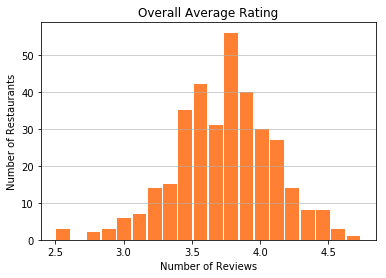

In [109]:
plt.hist(analysis['avg_rating'],bins=20, rwidth=0.9, color='#FF8033')
plt.title('Overall Average Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Restaurants')
plt.grid(axis='y', alpha=0.75)

In [110]:
analysis['rw_avg_rating'].mean()

3.743119266055048

In [106]:
excellent = analysis['avg_rating'] >= 4.25
e_rst = analysis[excellent].sort_values(['avg_rating'], ascending=False)
# print(e_rst.shape[0])
# e_rst.head()
e_rst.groupby(['restaurant_main_type']).count()

,alias,cur_rating,review_count,avg_rating,rating_1s,rating_2s,rating_3s,rating_4s,rating_5s,rw_review_count,rw_avg_rating,rw_rating_1s,rw_rating_2s,rw_rating_3s,rw_rating_4s,rw_rating_5s,price_range,diff
restaurant_main_type,,,,,,,,,,,,,,,,,,
American,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Contemporary American,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
French,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Italian,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
Other,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Seafood,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Steakhouse,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


In [107]:
b_rst = analysis[(excellent == False) & (analysis['rw_review_count'] != 0) & (analysis['rw_avg_rating'] - analysis['avg_rating'] >= 0.25)]
# print(b_rst.shape[0])
# b_rst.head()
b_rst.groupby(['restaurant_main_type']).count()

,alias,cur_rating,review_count,avg_rating,rating_1s,rating_2s,rating_3s,rating_4s,rating_5s,rw_review_count,rw_avg_rating,rw_rating_1s,rw_rating_2s,rw_rating_3s,rw_rating_4s,rw_rating_5s,price_range,diff
restaurant_main_type,,,,,,,,,,,,,,,,,,
American,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
Asian,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Chinese,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Contemporary American,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
French,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Greek,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Indian,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Italian,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26
Japanese & Koren,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


In [108]:
w_rst = analysis[(excellent == False) & (analysis['rw_review_count'] != 0) & (analysis['avg_rating'] - analysis['rw_avg_rating'] >= 0.25)]
# print(w_rst.shape[0])
# w_rst.head()
w_rst.groupby(['restaurant_main_type']).count()

,alias,cur_rating,review_count,avg_rating,rating_1s,rating_2s,rating_3s,rating_4s,rating_5s,rw_review_count,rw_avg_rating,rw_rating_1s,rw_rating_2s,rw_rating_3s,rw_rating_4s,rw_rating_5s,price_range,diff
restaurant_main_type,,,,,,,,,,,,,,,,,,
American,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
Asian,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Chinese,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Contemporary American,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
French,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
Italian,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
Japanese & Koren,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Mediterranean,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Mexican,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9


In [76]:
analysis[analysis['rw_review_count'] > 5].sort_values(['diff'], ascending=False)

,alias,cur_rating,review_count,avg_rating,rating_1s,rating_2s,rating_3s,rating_4s,rating_5s,rw_review_count,rw_avg_rating,rw_rating_1s,rw_rating_2s,rw_rating_3s,rw_rating_4s,rw_rating_5s,price_range,restaurant_main_type,diff
196,inakaya-new-york,3.5,511,3.66,46,48,94,170,153,6,4.67,0,0,0,2,4,$31 to $50,Japanese & Koren,1.01
263,el-vez-new-york,3.5,583,3.58,41,71,119,211,141,7,4.57,0,0,0,3,4,$30 and under,Mexican,0.99
248,the-mercer-kitchen-new-york-6,3.5,1505,3.31,170,212,370,492,261,7,4.29,0,0,2,1,4,$30 and under,American,0.98
319,il-cortile-restaurant-new-york,3.5,456,3.71,49,48,59,131,169,6,4.67,0,0,1,0,5,$31 to $50,Italian,0.96
286,delmonicos-new-york,4.0,968,3.80,53,100,169,315,331,11,4.73,0,0,0,3,8,$50 and over,Steakhouse,0.93
329,thalassa-restaurant-new-york,4.0,379,4.08,26,27,33,97,196,7,5.00,0,0,0,0,7,$31 to $50,Seafood,0.92
255,lure-fishbar-new-york-2,4.0,1554,3.86,73,120,256,613,492,11,4.73,0,0,1,1,9,$31 to $50,Seafood,0.87
130,david-burke-tavern-new-york,4.0,150,3.84,20,14,13,26,77,7,4.57,0,0,0,3,4,$31 to $50,American,0.73
175,mortons-the-steakhouse-new-york-2,4.0,476,3.89,28,45,64,151,188,8,4.62,0,0,1,1,6,$50 and over,Steakhouse,0.73
333,mortons-the-steakhouse-new-york-2,4.0,476,3.89,28,45,64,151,188,8,4.62,0,0,1,1,6,$50 and over,Steakhouse,0.73


In [75]:
analysis[analysis['rw_review_count'] > 5].sort_values(['diff'], ascending=True)

,alias,cur_rating,review_count,avg_rating,rating_1s,rating_2s,rating_3s,rating_4s,rating_5s,rw_review_count,rw_avg_rating,rw_rating_1s,rw_rating_2s,rw_rating_3s,rw_rating_4s,rw_rating_5s,price_range,restaurant_main_type,diff
173,le-colonial-new-york,3.5,260,3.35,29,34,65,82,50,9,1.67,6,1,1,1,0,$31 to $50,Southeast Asian,-1.68
157,barraca-new-york,3.5,644,3.68,62,75,88,199,220,8,2.12,3,3,1,0,1,$31 to $50,Spanish,-1.56
278,neta-new-york,4.0,358,3.85,25,35,55,95,148,10,2.60,3,2,2,2,1,$50 and over,Japanese & Koren,-1.25
206,perrine-new-york-2,4.0,56,3.88,4,4,11,13,24,6,2.67,1,2,2,0,1,$31 to $50,French,-1.21
151,american-cut-steakhouse-tribeca-new-york,4.0,536,3.88,40,43,78,156,219,10,3.00,2,2,1,4,1,$31 to $50,Steakhouse,-0.88
290,american-cut-steakhouse-tribeca-new-york,4.0,536,3.88,40,43,78,156,219,10,3.00,2,2,1,4,1,$31 to $50,Steakhouse,-0.88
37,lavo-new-york-4,3.5,965,3.25,197,96,168,274,230,8,2.38,3,1,3,0,1,$50 and over,Italian,-0.87
260,perry-st-new-york,4.0,908,3.96,32,74,140,314,348,7,3.29,1,1,1,3,1,$31 to $50,Contemporary American,-0.67
267,hearth-new-york,4.0,683,3.81,40,69,119,209,246,7,3.14,0,3,1,2,1,$50 and over,American,-0.67
171,high-street-on-hudson-new-york,4.0,372,3.78,30,29,61,125,127,9,3.11,1,3,0,4,1,$31 to $50,Contemporary American,-0.67


# Maps

In [25]:
import folium
from folium import plugins
import seaborn as sns
import matplotlib.cm as cm


In [14]:
m = folium.Map([40.75, -73.99], zoom_start=12)

# mark each station as a point
for index, row in rstw_2018.iterrows():
    folium.CircleMarker([rstw_2018['latitude'], rstw_2018['longitude']],
                        radius=15,
                        popup=row['name'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)

# convert to (n, 2) nd-array format for heatmap
stationArr = rstw_2018[['latitude', 'longitude']].values

# plot heatmap
m.add_child(plugins.HeatMap(stationArr, radius=15))
# m.save('rstw_heatmap.html')
m

In [133]:
main_type_list = (rstw_2018.restaurant_main_type.unique()).tolist()
# colors = cm.rainbow(np.linspace(0, 1, len(main_type_list)))
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred',
             'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue',
             'darkpurple', 'pink', 'lightblue', 'lightgreen',
             'gray', 'lightgray']

def get_color(i):
    return colors[i % len(main_type_list)]
    return colors[main_type_list.index(rstw_2018.iloc[i]['restaurant_main_type'])]

In [134]:
m_2 = folium.Map([40.75, -73.99], zoom_start=14)

for i in range(len(rstw_2018)):
    folium.Marker([rstw_2018.iloc[i]['latitude'], rstw_2018.iloc[i]['longitude']],
                  tooltip = rstw_2018.iloc[i]['name'],
                 icon=folium.Icon(color=get_color(i))).add_to(m_2)


m_2.save('rstw_marker.html')    
m_2

In [131]:
m_3 = folium.Map([40.75, -73.99], zoom_start=14)

folium.Marker([40.75, -73.99],
                  tooltip = rstw_2018.iloc[0]['name'],
                 icon=folium.Icon(color='aqua')).add_to(m_3)

m_3